In [268]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurant/zomato_restaurants_in_India.csv


In [269]:
df_zs = pd.read_csv(os.path.join(dirname, filenames[0]))
df_zs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [270]:
df_zs.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [271]:
df_zs.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [272]:
df_zs.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [273]:
df_zs.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
211939     True
211940    False
211941     True
211942    False
211943     True
Length: 211944, dtype: bool

In [274]:
df_zs.duplicated().sum()

151527

In [275]:
df_zs = df_zs.drop_duplicates()




In [276]:
df_zs = df_zs.drop('country_id', axis=1)


In [277]:
df_zs = df_zs.drop('city_id', axis=1)

In [278]:
df_zs = df_zs.drop('latitude', axis=1)

In [279]:
df_zs = df_zs.drop('longitude', axis=1)

In [280]:
df_zs = df_zs.drop('currency', axis=1)

In [281]:
df_zs = df_zs.drop('opentable_support', axis=1)

In [282]:
df_zs = df_zs.drop('url', axis=1)

In [283]:
df_zs = df_zs.drop('zipcode', axis=1)

In [284]:
df_zs = df_zs.drop('locality_verbose', axis=1)

In [285]:
df_zs = df_zs.drop('photo_count', axis=1)

In [286]:
df_zs = df_zs.drop('address', axis=1)

In [287]:

import ast

df_zs['establishment'] = df_zs['establishment'].apply(lambda x: ', '.join(ast.literal_eval(x) if isinstance(x, str) else x))

# Display the updated DataFrame
#print(df_zs['establishment'].head())

In [288]:
df_zs.info()
#df_zs.head()
#print(df_zs['locality_verbose'].head(20))
#columns_of_interest = ['address', 'city', 'locality']  # Replace with your actual column names
#print(df_zs[columns_of_interest].head(20))


<class 'pandas.core.frame.DataFrame'>
Index: 60417 entries, 0 to 211942
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60417 non-null  int64  
 1   name                  60417 non-null  object 
 2   establishment         60417 non-null  object 
 3   city                  60417 non-null  object 
 4   locality              60417 non-null  object 
 5   cuisines              59947 non-null  object 
 6   timings               59347 non-null  object 
 7   average_cost_for_two  60417 non-null  int64  
 8   price_range           60417 non-null  int64  
 9   highlights            60417 non-null  object 
 10  aggregate_rating      60417 non-null  float64
 11  rating_text           60417 non-null  object 
 12  votes                 60417 non-null  int64  
 13  delivery              60417 non-null  int64  
 14  takeaway              60417 non-null  int64  
dtypes: float64(1), int64(6)

In [289]:
df_zs.duplicated().sum()

119

In [290]:
for column in df_zs:
        print("Column"," ",column,"  uniquevalue are :", df_zs[column].nunique())
        print(df_zs[column].unique())
        print("------------------------------------------------------------------") 

Column   res_id   uniquevalue are : 55568
[ 3400299  3400005  3401013 ... 18019952  3200996  3201138]
------------------------------------------------------------------
Column   name   uniquevalue are : 41100
['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Red China' 'Wah Ustad' 'Geeta lodge']
------------------------------------------------------------------
Column   establishment   uniquevalue are : 27
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
------------------------------------------------------------------
Column   city   uniquevalue are : 99
['Agra' 'Ahmedabad' 'Gandhinagar' 'Ajmer' 'Alappuzha' 'Allahabad'
 'Amravati' 'Amritsar' 'Aurangabad' 'Bangalore' 'Bhopal' 'Bhubaneshwar'
 'Chandigarh' 'Moha

In [291]:
for column in df_zs:
        print("Column"," ",column,"  value count is :", df_zs[column].value_counts())
        print("------------------------------------------------------------------") 

Column   res_id   value count is : res_id
18453954    9
49261       7
18800810    6
72604       5
18548856    5
           ..
2100484     1
2100122     1
18710135    1
2100223     1
3201138     1
Name: count, Length: 55568, dtype: int64
------------------------------------------------------------------
Column   name   value count is : name
Domino's Pizza                                       406
Cafe Coffee Day                                      323
KFC                                                  261
Subway                                               211
Keventers                                            208
                                                    ... 
Jai Bhole ki Vaishnav Bhojnalaya                       1
Shri Hari Snacks                                       1
Greeno Restaurant                                      1
The Dark Mustache ( Kathi Roll Barbeque Chicken )      1
Geeta lodge                                            1
Name: count, Length: 41100, dty

In [292]:
for column in df_zs:
        print( "column name:", column, "- misisng values ",df_zs[column].isnull().sum())
        print("------------------------------------------------------------------") 

column name: res_id - misisng values  0
------------------------------------------------------------------
column name: name - misisng values  0
------------------------------------------------------------------
column name: establishment - misisng values  0
------------------------------------------------------------------
column name: city - misisng values  0
------------------------------------------------------------------
column name: locality - misisng values  0
------------------------------------------------------------------
column name: cuisines - misisng values  470
------------------------------------------------------------------
column name: timings - misisng values  1070
------------------------------------------------------------------
column name: average_cost_for_two - misisng values  0
------------------------------------------------------------------
column name: price_range - misisng values  0
------------------------------------------------------------------
colum

In [293]:
for column in df_zs:
    missing_values = df_zs[column].isnull().sum()
    if missing_values > 0:
        print("-------------------------")
        print("column name:", column, "- missing values:", missing_values)
        print("------------------------------------------------------------------")

-------------------------
column name: cuisines - missing values: 470
------------------------------------------------------------------
-------------------------
column name: timings - missing values: 1070
------------------------------------------------------------------


# Now examining each column one by one

# Establishment

In [294]:
#df_zs.info()
df_zs.head()

,res_id,name,establishment,city,locality,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,Agra,Shahganj,"Fast Food, Mithai",9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,1,-1
3,3400290,Bhagat Halwai,Quick Bites,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,Agra,Tajganj,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,1,-1


establishment
Quick Bites        15477
Casual Dining      13763
Café                4644
Dessert Parlour     3915
Bakery              3887
Sweet Shop          2712
Beverage Shop       2566
                    1920
Fine Dining         1656
Food Court          1569
Bar                 1550
Dhaba               1334
Kiosk               1196
Lounge               898
Food Truck           874
Bhojanalya           654
Mess                 397
Pub                  393
Paan Shop            326
Confectionery        227
Butcher Shop         154
Microbrewery         136
Club                 113
Shack                 21
Cocktail Bar          17
Irani Cafe            14
Pop up                 4
Name: count, dtype: int64


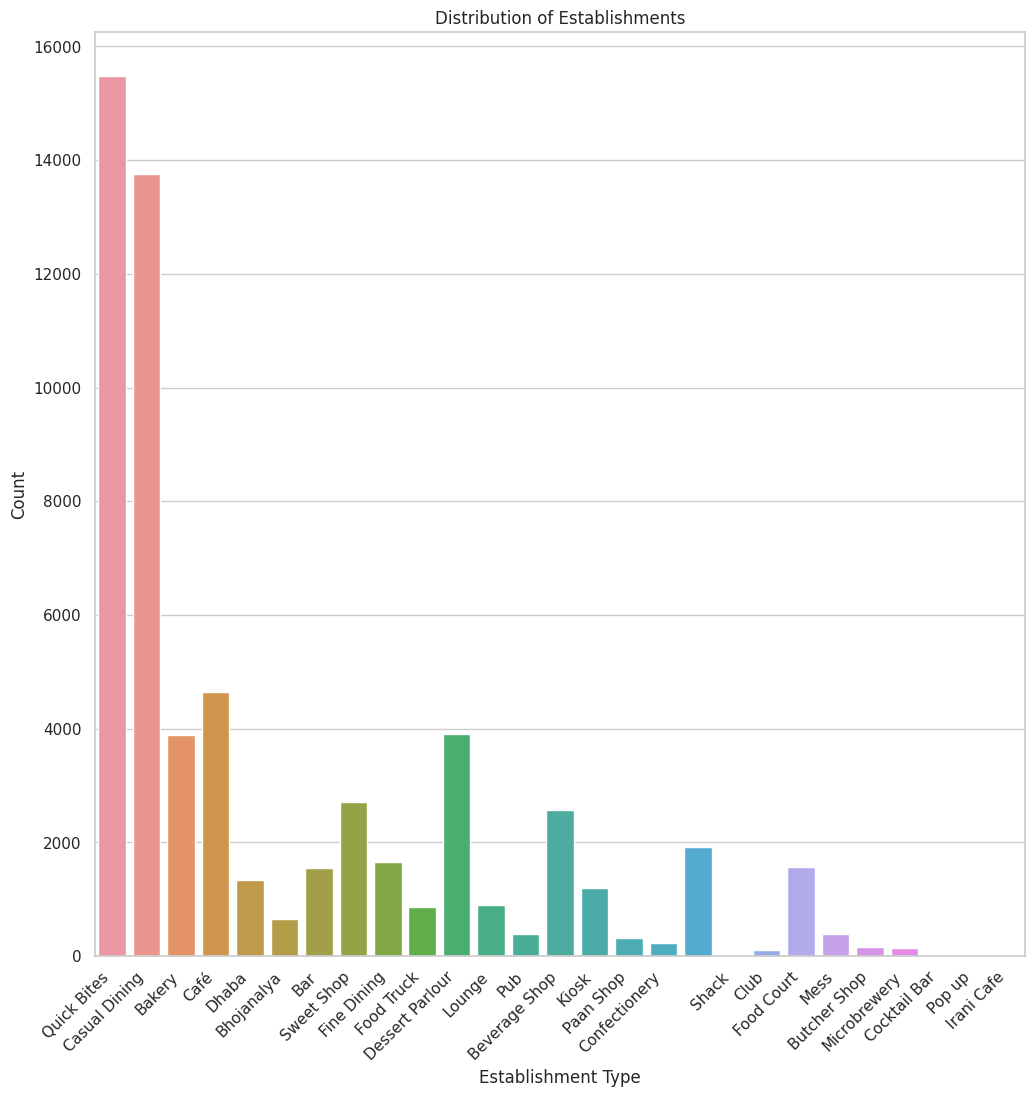

In [295]:
# Check unique values and their counts in the 'establishment' column
establishment_counts = df_zs['establishment'].value_counts()
print(establishment_counts)

# Plot the distribution of establishments
plt.figure(figsize=(12, 12))
sns.countplot(data=df_zs, x='establishment')
plt.title('Distribution of Establishments')
plt.xlabel('Establishment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('Distribution of Establishments.png')

plt.show()

establishment
Microbrewery       4.310294
Pub                3.798219
Cocktail Bar       3.570588
Lounge             3.507127
Fine Dining        3.490942
Club               3.383186
Casual Dining      3.321892
Irani Cafe         3.321429
Café               3.300732
Bar                3.133613
Dessert Parlour    3.132107
Butcher Shop       3.110390
Quick Bites        3.092815
                   2.945365
Sweet Shop         2.730162
Food Court         2.682473
Bakery             2.620118
Beverage Shop      2.573967
Dhaba              2.568966
Kiosk              2.362876
Food Truck         2.320023
Mess               2.200252
Paan Shop          1.875767
Pop up             1.800000
Bhojanalya         1.552446
Shack              1.528571
Confectionery      1.527753
Name: aggregate_rating, dtype: float64


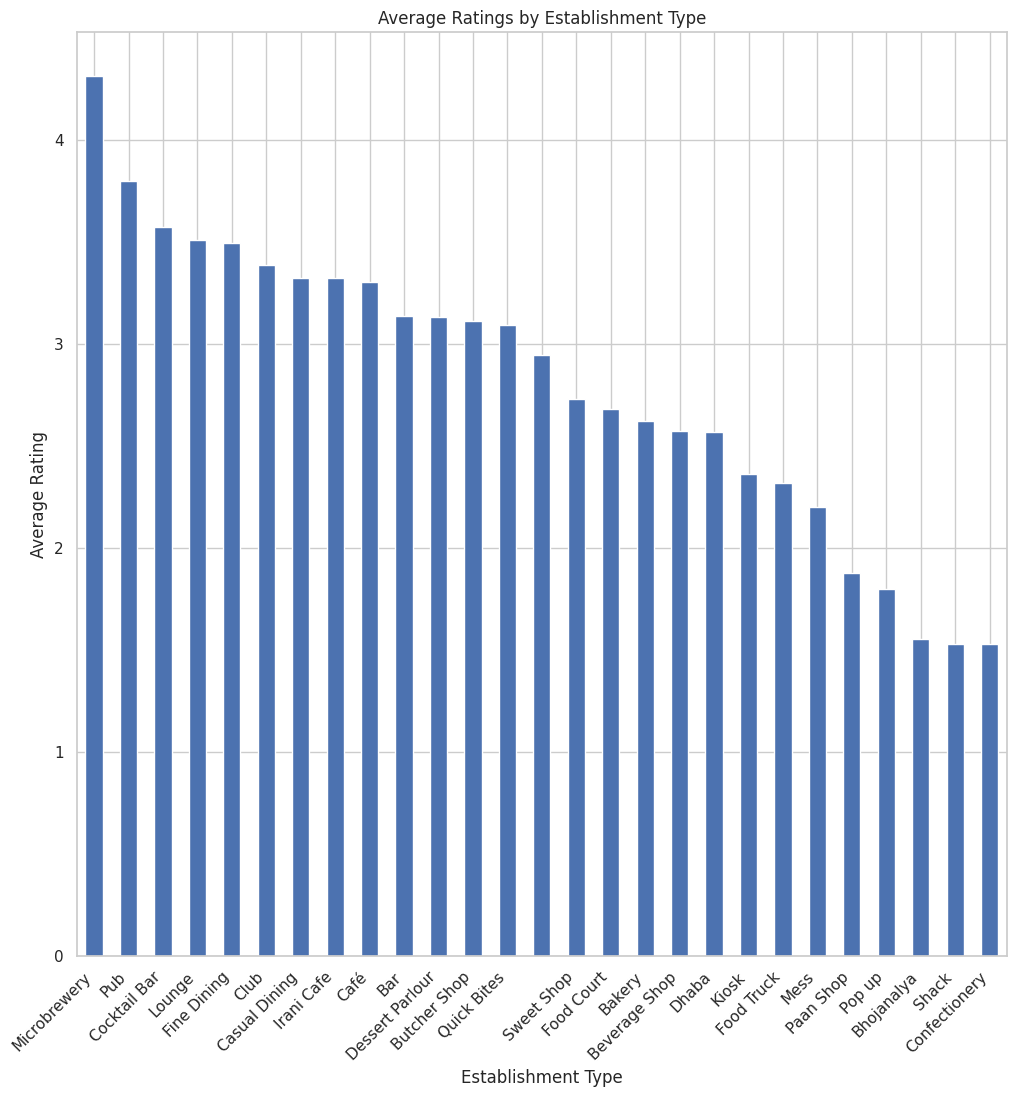

In [296]:
# Analyze the average ratings for each establishment type
avg_ratings_by_establishment = df_zs.groupby('establishment')['aggregate_rating'].mean().sort_values(ascending=False)
print(avg_ratings_by_establishment)

# Plot average ratings by establishment type
plt.figure(figsize=(12, 12))
avg_ratings_by_establishment.plot(kind='bar')
plt.title('Average Ratings by Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

plt.savefig('Average-Ratings-by Establishment-Type.png')
plt.show()

# City

city
Gurgaon         3.872549
Secunderabad    3.848454
Mumbai          3.795863
Hyderabad       3.775751
New Delhi       3.770005
                  ...   
Kharagpur       1.129310
Darjeeling      0.961207
Pushkar         0.952459
Palakkad        0.932584
Alappuzha       0.525843
Name: aggregate_rating, Length: 99, dtype: float64


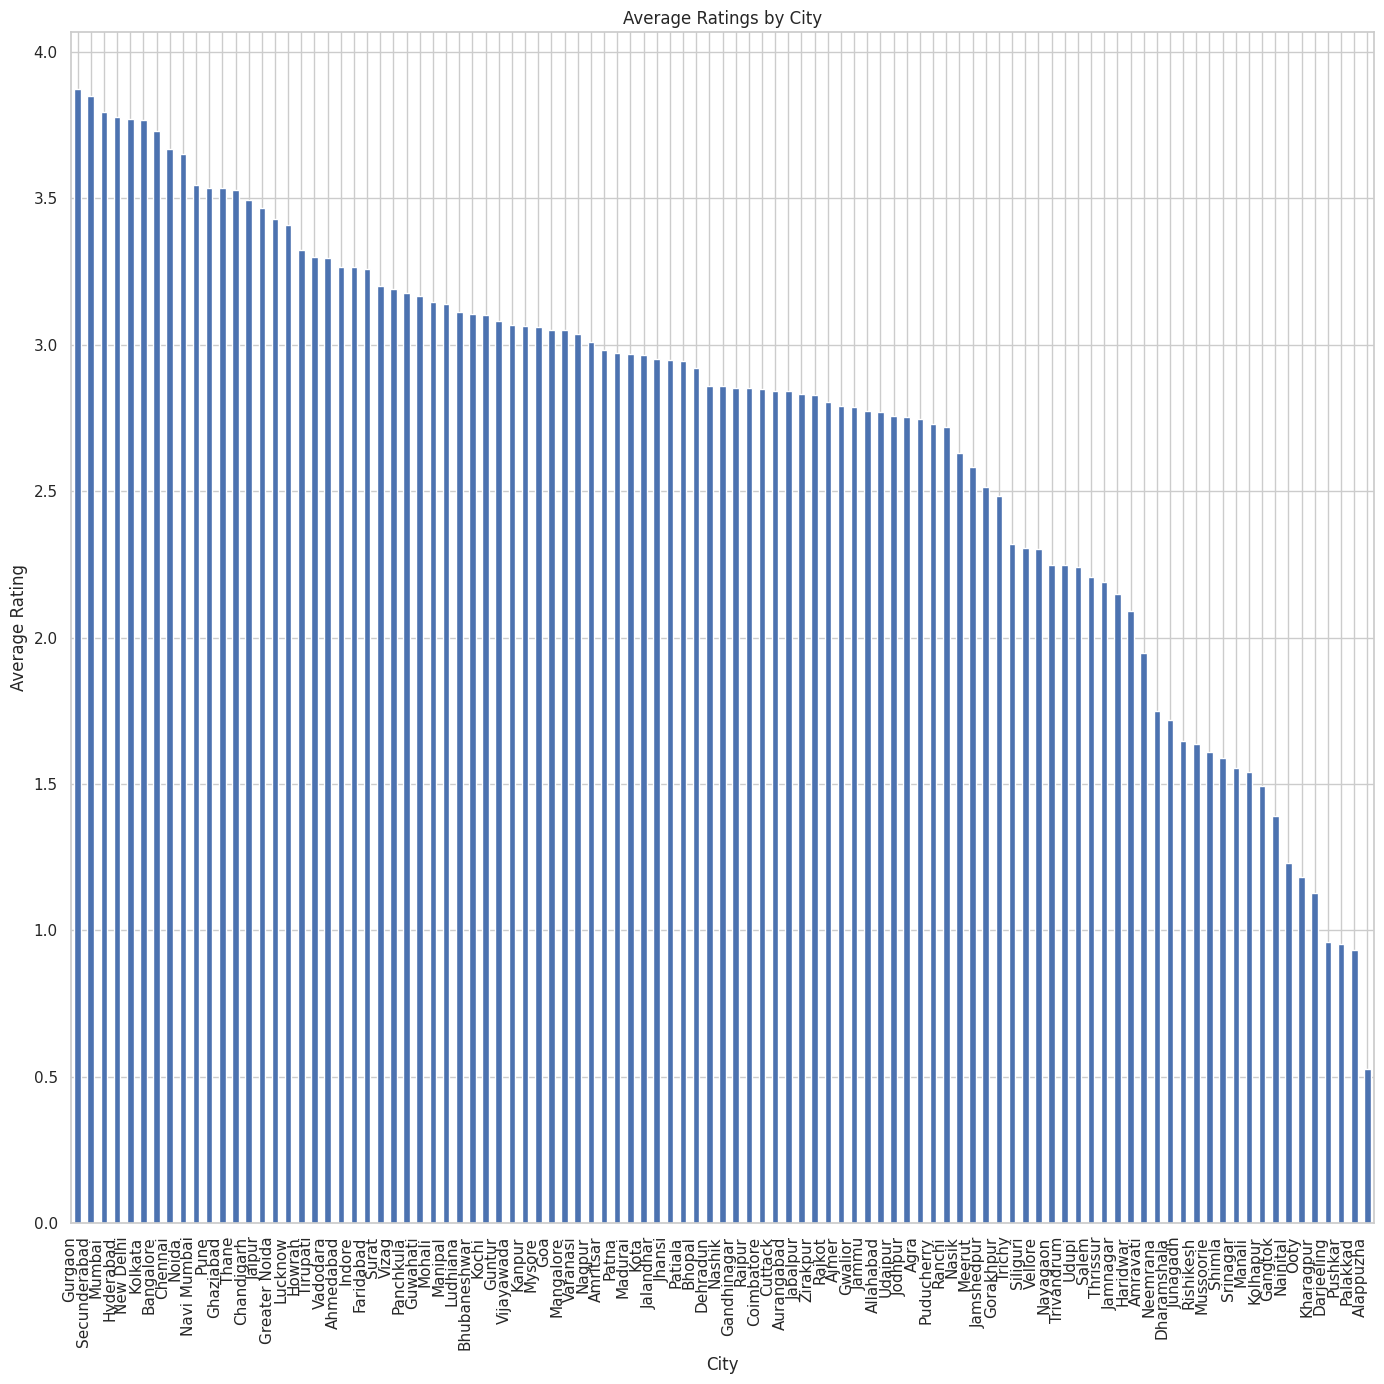

In [297]:
# Analyze the average ratings for each city


avg_ratings_by_city = df_zs.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)
print(avg_ratings_by_city)

# Plot average ratings by city
plt.figure(figsize=(14, 14))  # Increase figure size
avg_ratings_by_city.plot(kind='bar')
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('Average-Ratings-by-City.png')


plt.show()

city
Chennai          2612
Mumbai           2538
Bangalore        2365
Pune             1911
New Delhi        1847
                 ... 
Udupi              61
Howrah             50
Neemrana           26
Greater Noida      22
Nayagaon           15
Name: count, Length: 99, dtype: int64


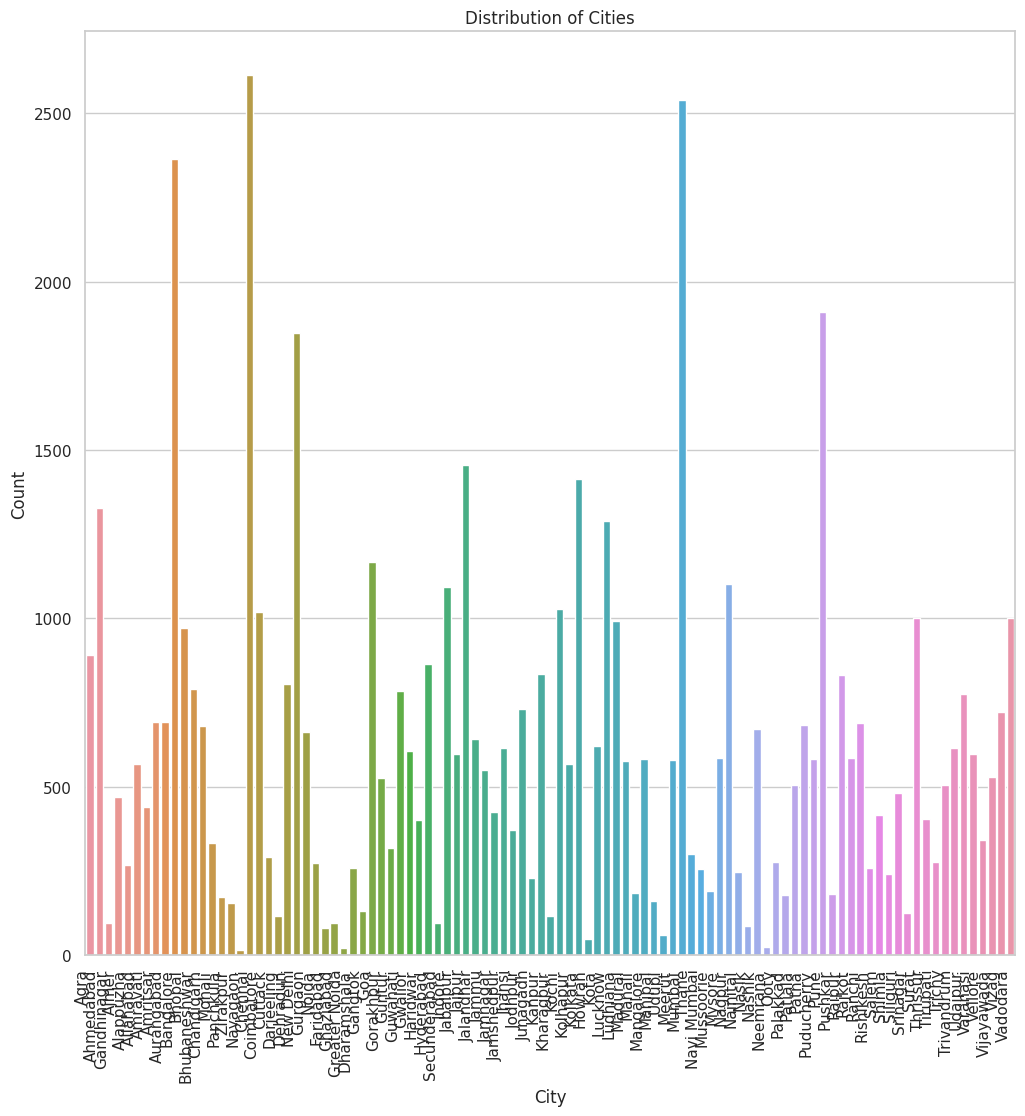

In [298]:
# Check unique values and their counts in the 'city' column
city_counts = df_zs['city'].value_counts()
print(city_counts)

# Plot the distribution of cities
plt.figure(figsize=(12, 12))
sns.countplot(data=df_zs, x='city')
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.savefig('Distribution-of-Cities.png')
plt.show()

# Votes

In [299]:
# Summary statistics for the 'votes' column
votes_summary = df_zs['votes'].describe()
print(votes_summary)


count    60417.000000
mean       261.574888
std        728.284194
min        -18.000000
25%          7.000000
50%         42.000000
75%        207.000000
max      42539.000000
Name: votes, dtype: float64


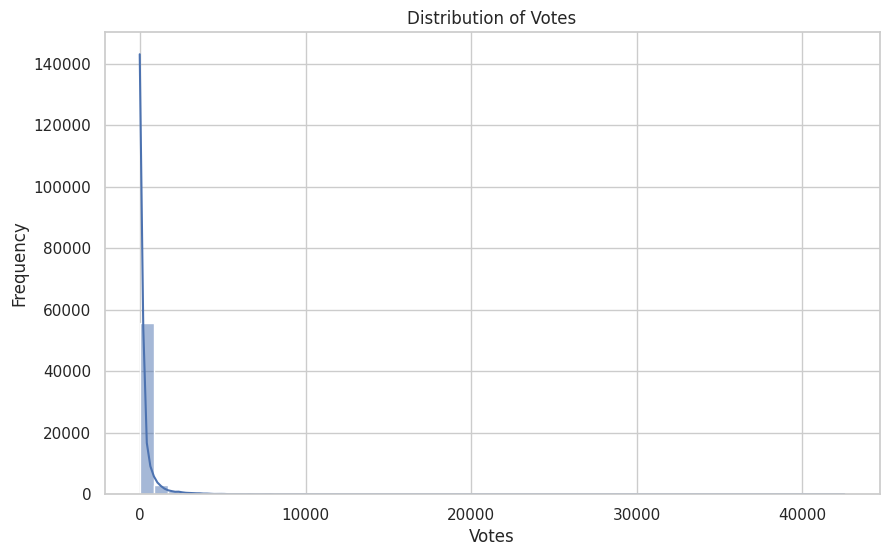

In [300]:
# Plot a histogram to visualize the distribution of votes
plt.figure(figsize=(10, 6))
sns.histplot(df_zs['votes'], bins=50, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

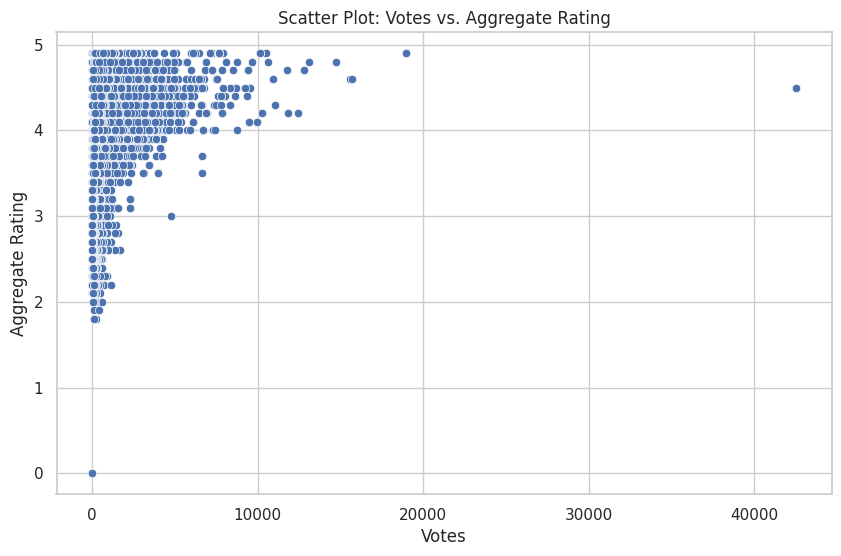

In [301]:
# Scatter plot to explore the relationship between 'votes' and 'aggregate_rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='aggregate_rating', data=df_zs)
plt.title('Scatter Plot: Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

Top 10 Restaurants with the Highest Votes:
                              name  votes
77763                     Bawarchi  42539
78324                     Bawarchi  42539
19636  Byg Brewski Brewing Company  18967
19931  Byg Brewski Brewing Company  18967
19648                         Toit  15705
19641                     Truffles  15582
56065             Hauz Khas Social  14751
53891             Hauz Khas Social  14751
19677    AB's - Absolute Barbecues  13095
79328                     Paradise  12829


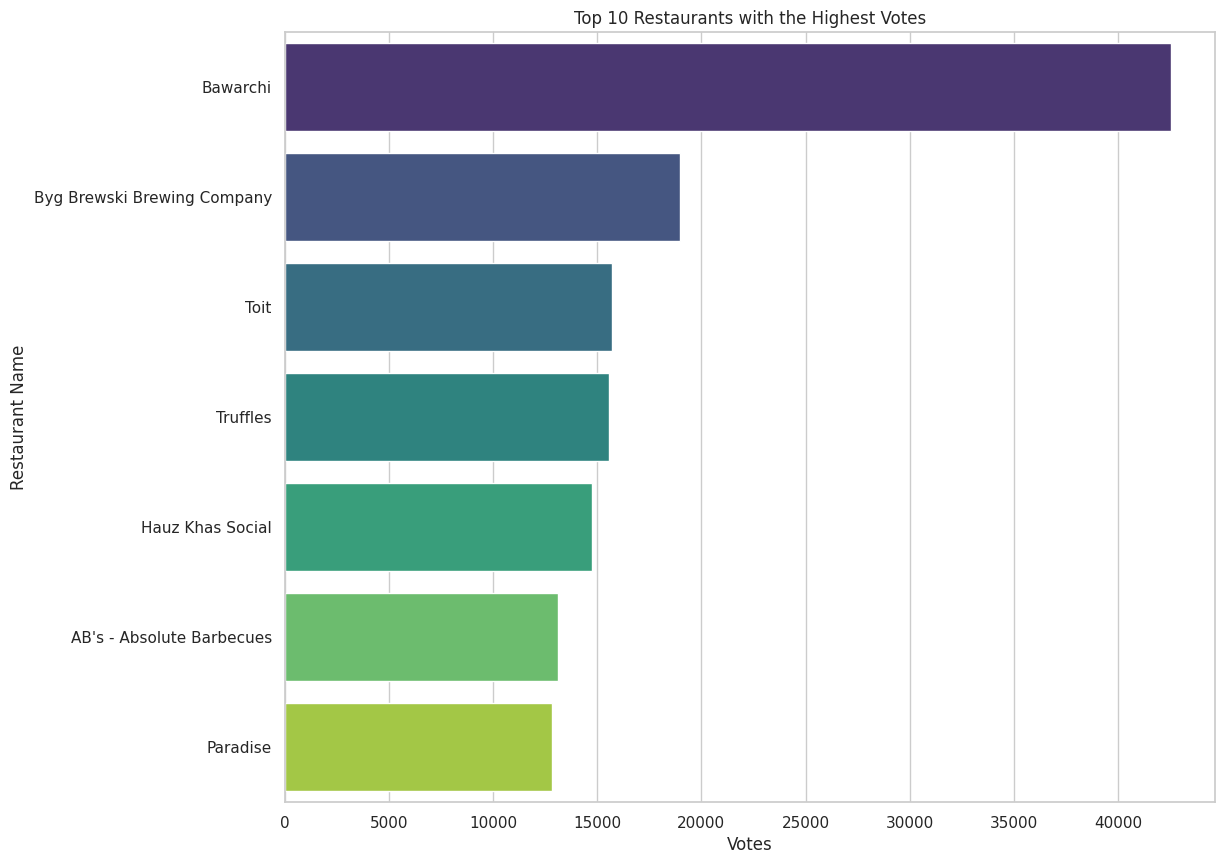

In [302]:
# Sort the DataFrame by 'votes' in descending order and select the top 10
top_restaurants = df_zs.sort_values(by='votes', ascending=False).head(10)

# Display the top restaurants with the highest votes
print("Top 10 Restaurants with the Highest Votes:")
print(top_restaurants[['name', 'votes']])

# Visualize the top 10 restaurants with a bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x='votes', y='name', data=top_restaurants, palette='viridis')
plt.title('Top 10 Restaurants with the Highest Votes')
plt.savefig('top-10-res.png')

plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.show()

# Cuisines

In [303]:
# Check unique values and their counts in the 'cuisines' column
cuisines_counts = df_zs['cuisines'].value_counts()
print("Cuisines Count")
print(cuisines_counts)


Cuisines Count
cuisines
North Indian                                    4587
Fast Food                                       2137
North Indian, Chinese                           1720
Bakery                                          1618
South Indian                                    1600
                                                ... 
North Indian, Fast Food, Healthy Food              1
Beverages, Healthy Food, Fast Food                 1
Fast Food, Street Food, South Indian, Bakery       1
Tibetan, Street Food                               1
North Indian, Lucknowi, Chinese                    1
Name: count, Length: 9382, dtype: int64


In [304]:
print("Top 10 Cuisines by Count:")
print(cuisines_counts.head(10))

Top 10 Cuisines by Count:
cuisines
North Indian             4587
Fast Food                2137
North Indian, Chinese    1720
Bakery                   1618
South Indian             1600
Street Food              1221
Cafe                     1180
Mithai                   1032
Desserts                  950
Bakery, Desserts          872
Name: count, dtype: int64


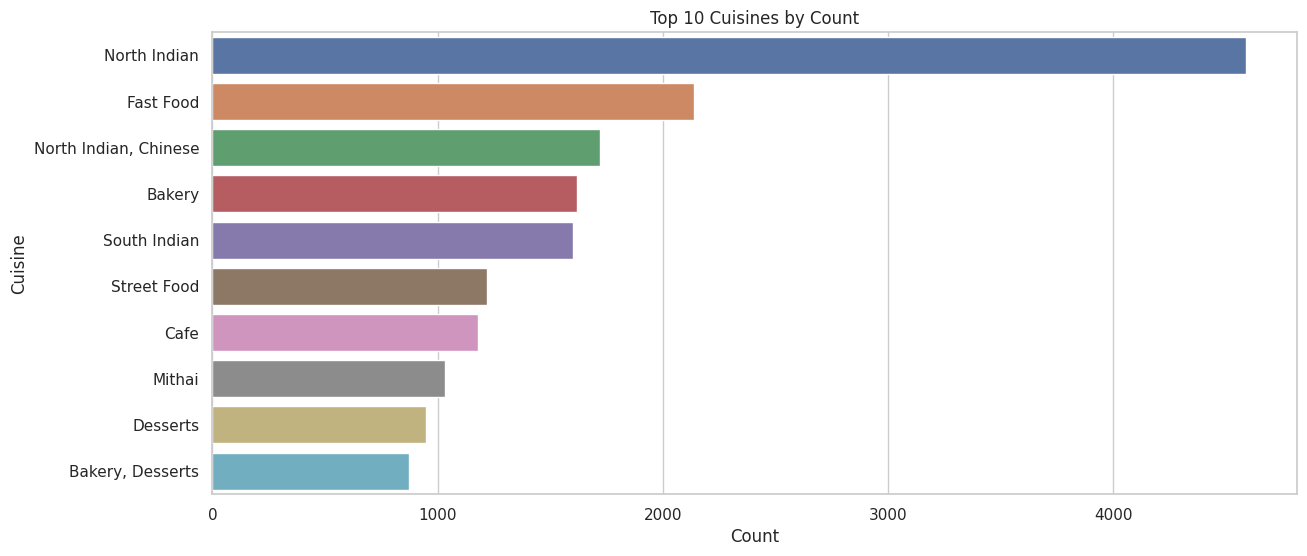

In [305]:
# Visualize the distribution of cuisines
plt.figure(figsize=(14, 6))
sns.countplot(data=df_zs, y='cuisines', order=df_zs['cuisines'].value_counts().index[:10])
plt.title('Top 10 Cuisines by Count')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.savefig('top-10-cuisines.png')

plt.show()

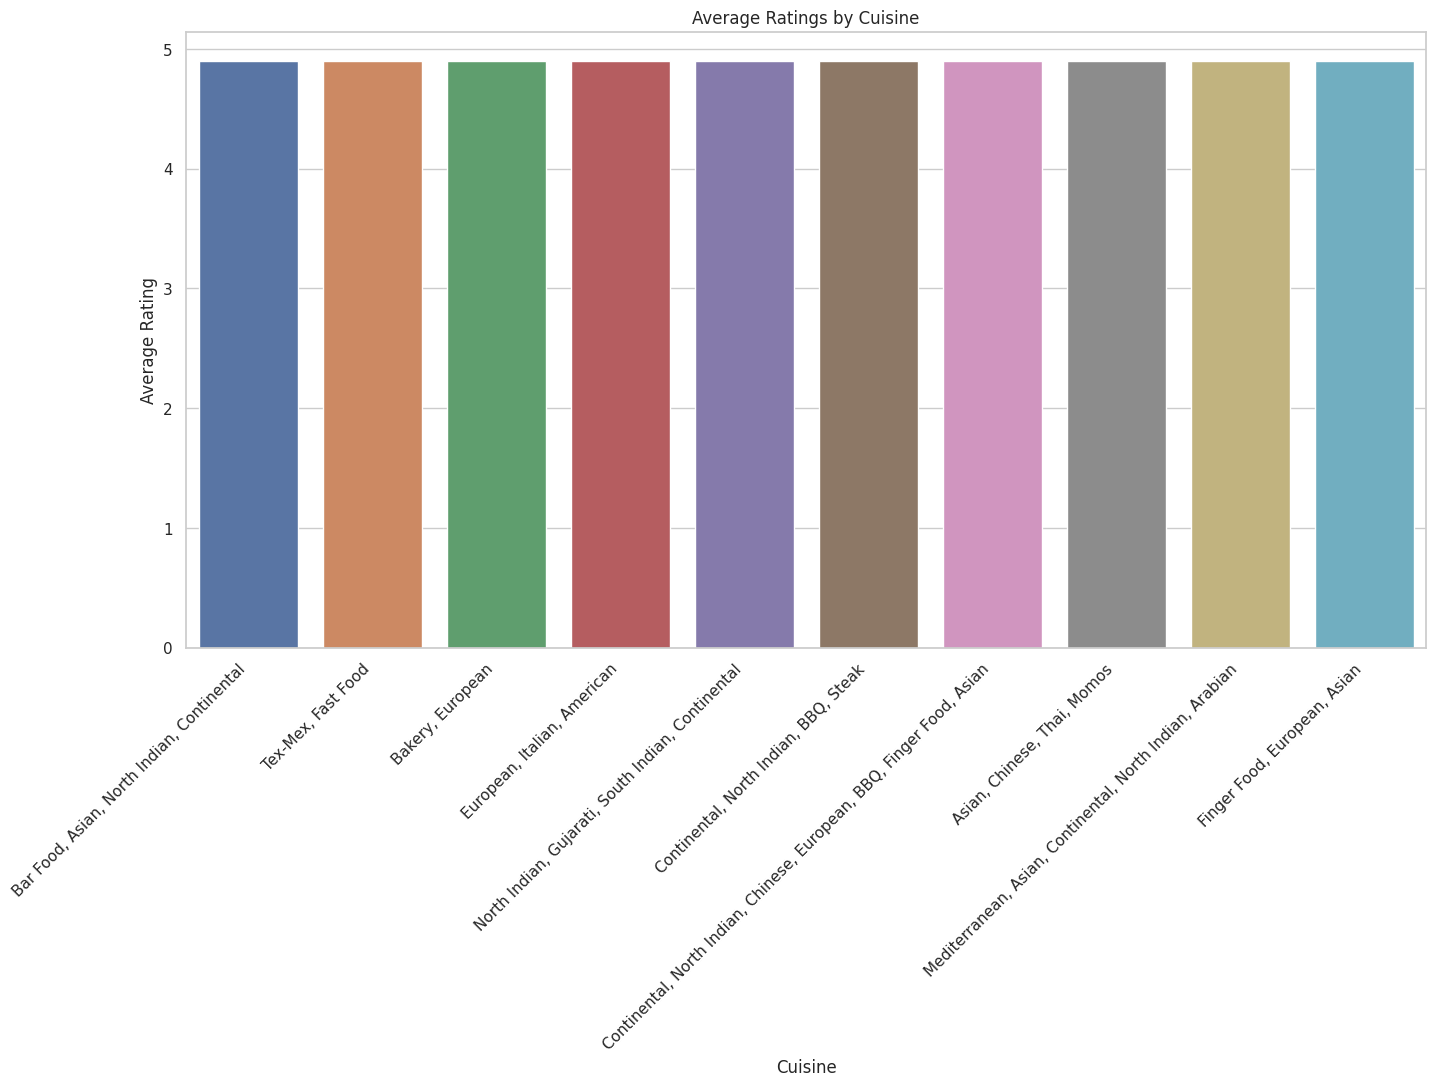

In [306]:
plt.figure(figsize=(16, 8))
sns.barplot(x='cuisines', y='aggregate_rating', data=df_zs, order=df_zs.groupby('cuisines')['aggregate_rating'].mean().sort_values(ascending=False).index[:10])
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('avg-rating-by-cuisine.png')

plt.show()

# Price Range

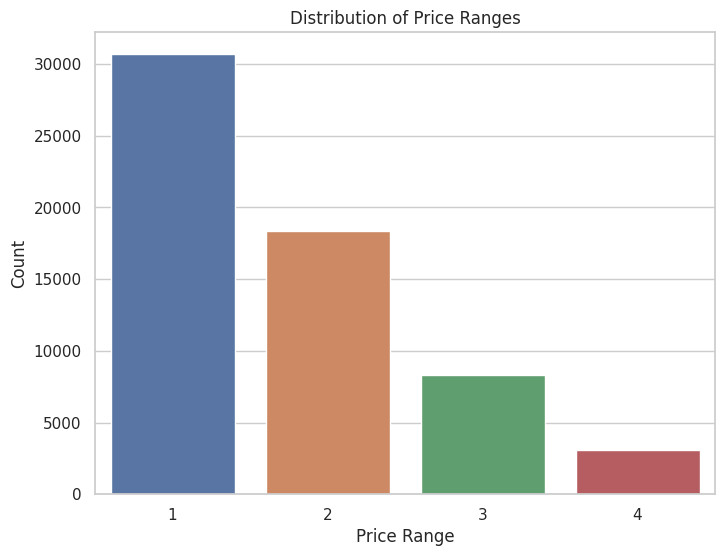

In [307]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_zs, x='price_range')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.savefig('Distribution-of-Price-Ranges.png')

plt.show()

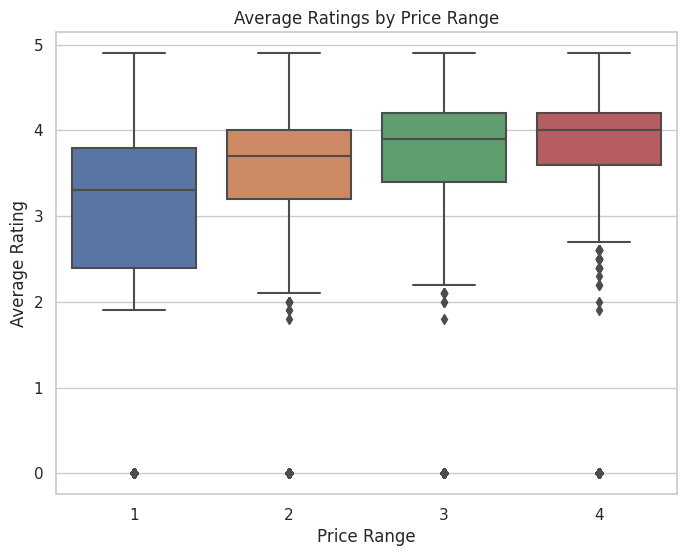

In [308]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='aggregate_rating', data=df_zs)
plt.title('Average Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

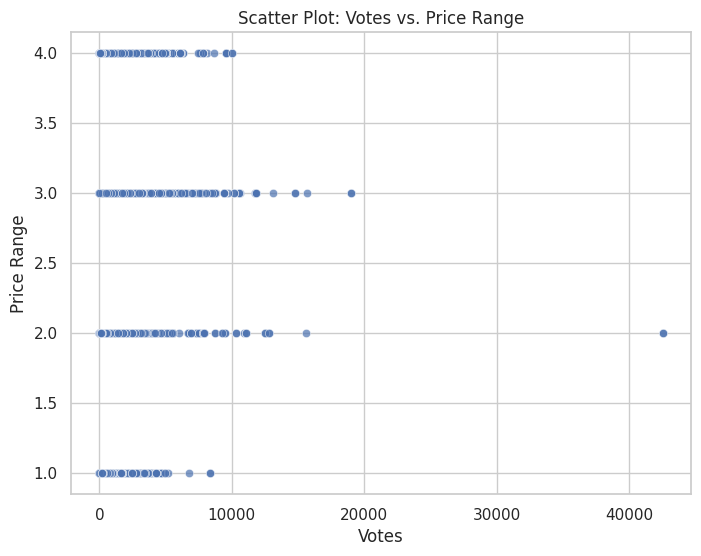

In [309]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='votes', y='price_range', data=df_zs, alpha=0.7)
plt.title('Scatter Plot: Votes vs. Price Range')
plt.xlabel('Votes')
plt.ylabel('Price Range')
plt.show()

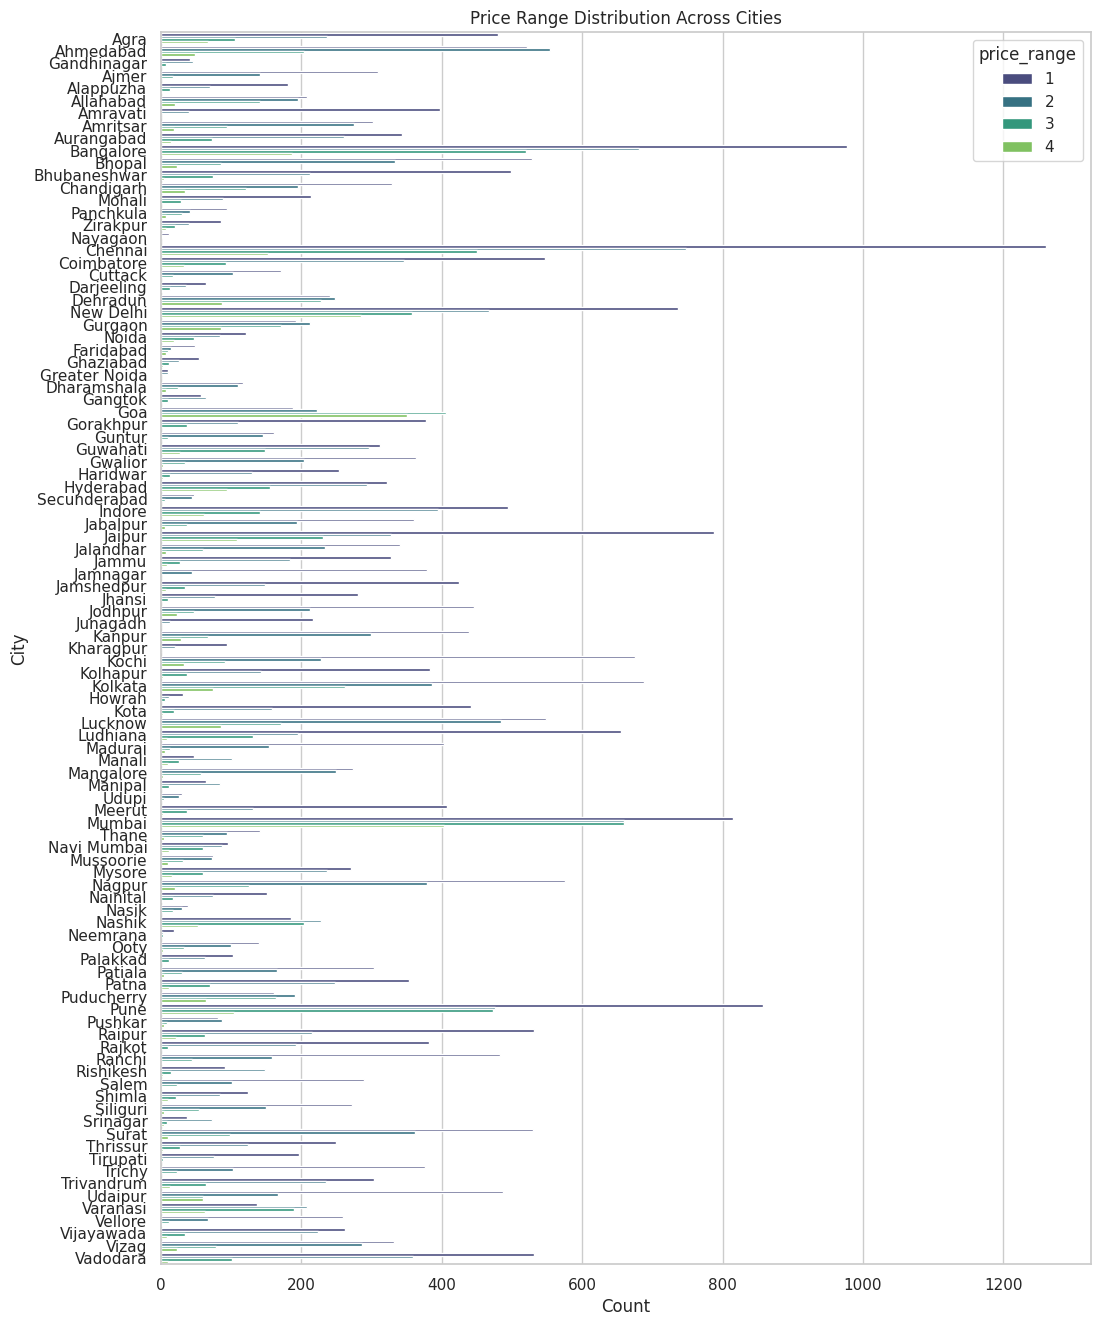

In [310]:
plt.figure(figsize=(12, 16))  # Adjust the figure size for better readability
sns.countplot(data=df_zs, y='city', hue='price_range', palette='viridis')
plt.title('Price Range Distribution Across Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.savefig('Distribution-of-Price-Ranges-across-cities.png')


plt.show()



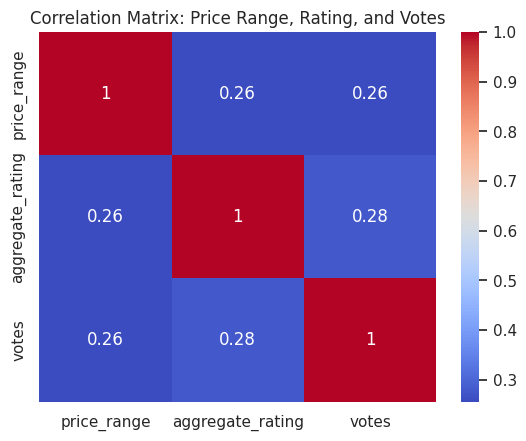

In [311]:
correlation_matrix = df_zs[['price_range', 'aggregate_rating', 'votes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Price Range, Rating, and Votes')
plt.savefig('Correlation-Matrix:-Price Range,Rating,andVotes.png')

plt.show()


# Average Cost for Two

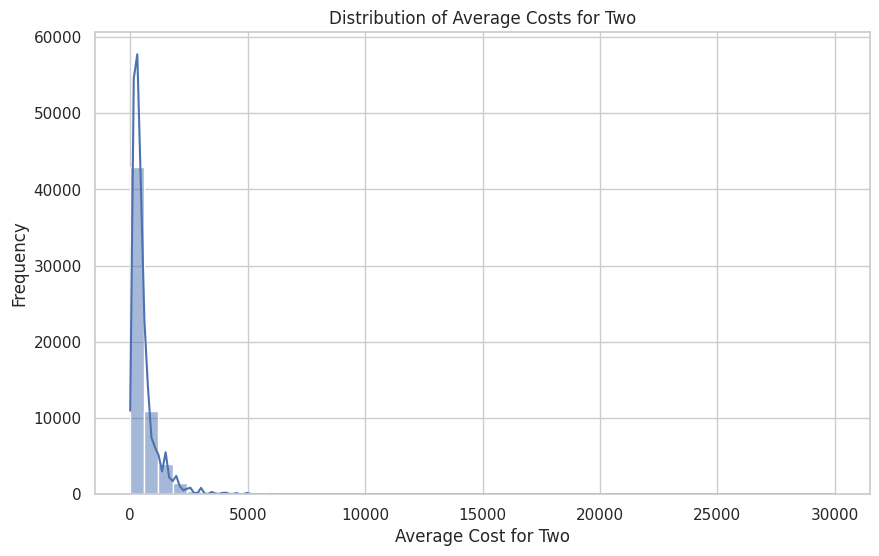

In [312]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_zs, x='average_cost_for_two', bins=50, kde=True)
plt.title('Distribution of Average Costs for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()

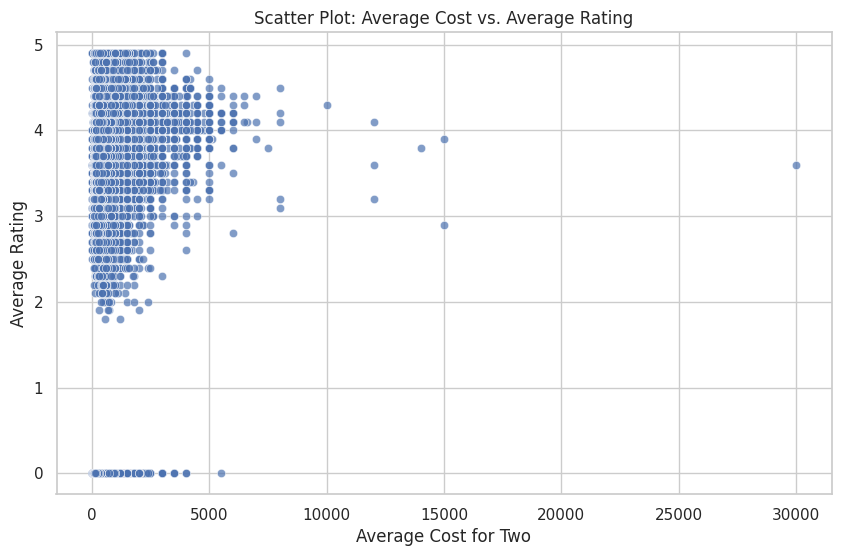

In [313]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_cost_for_two', y='aggregate_rating', data=df_zs, alpha=0.7)
plt.title('Scatter Plot: Average Cost vs. Average Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Average Rating')
plt.show()


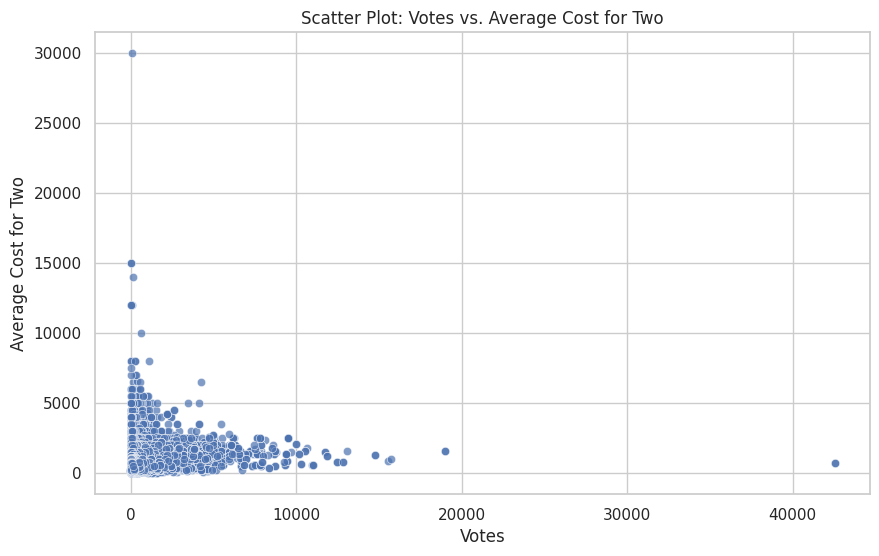

In [314]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='average_cost_for_two', data=df_zs, alpha=0.7)
plt.title('Scatter Plot: Votes vs. Average Cost for Two')
plt.xlabel('Votes')
plt.ylabel('Average Cost for Two')
plt.show()


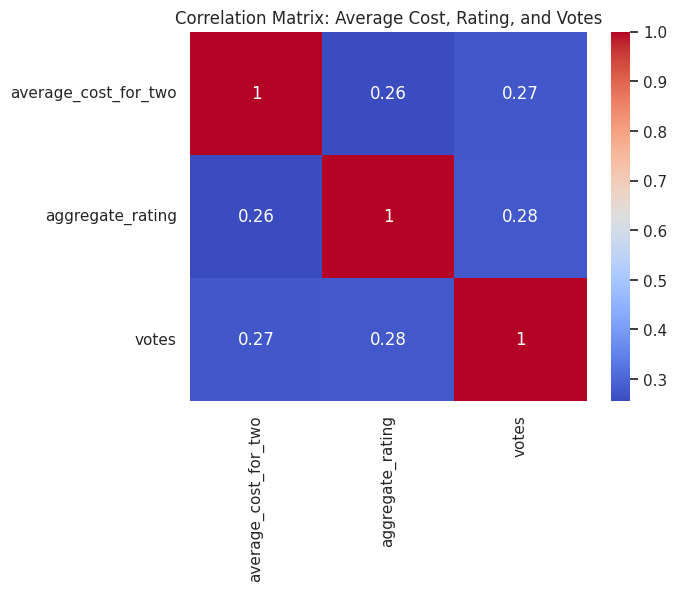

In [315]:
correlation_matrix = df_zs[['average_cost_for_two', 'aggregate_rating', 'votes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Average Cost, Rating, and Votes')
plt.show()


# Delivery

In [316]:
#df_zs.info()
#df_zs.head()
#df_zs['timings'] = pd.to_datetime(df_zs['timings'], format='%H:%M:%S', errors='coerce')\# Check the distribution of values in the "delivery" column
print("Distribution of values in 'delivery' column:")
print(df_zs['delivery'].value_counts())


Distribution of values in 'delivery' column:
delivery
-1    41268
 1    18805
 0      344
Name: count, dtype: int64


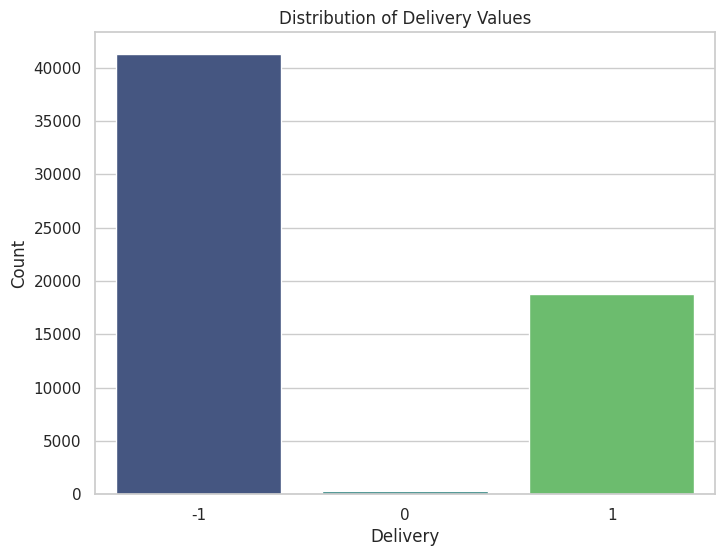

In [317]:
# Bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='delivery', data=df_zs, palette='viridis')
plt.title('Distribution of Delivery Values')
plt.xlabel('Delivery')
plt.ylabel('Count')
plt.savefig('Distribution-of-Delivery-Values.png')

plt.show()


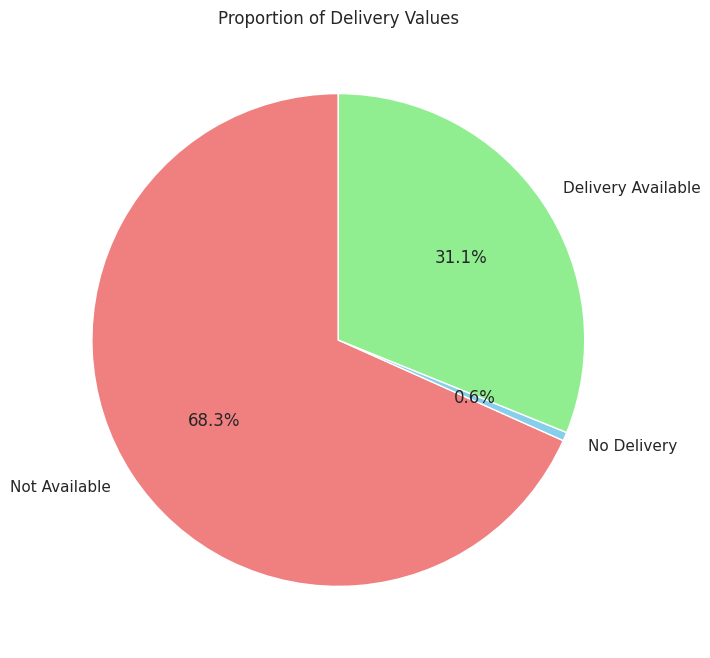

In [318]:
# Pie chart for a visual representation of the proportions
plt.figure(figsize=(8, 8))
labels = ['Not Available', 'No Delivery', 'Delivery Available']
sizes = df_zs['delivery'].value_counts().sort_index()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen'], startangle=90)
plt.title('Proportion of Delivery Values')
plt.show()

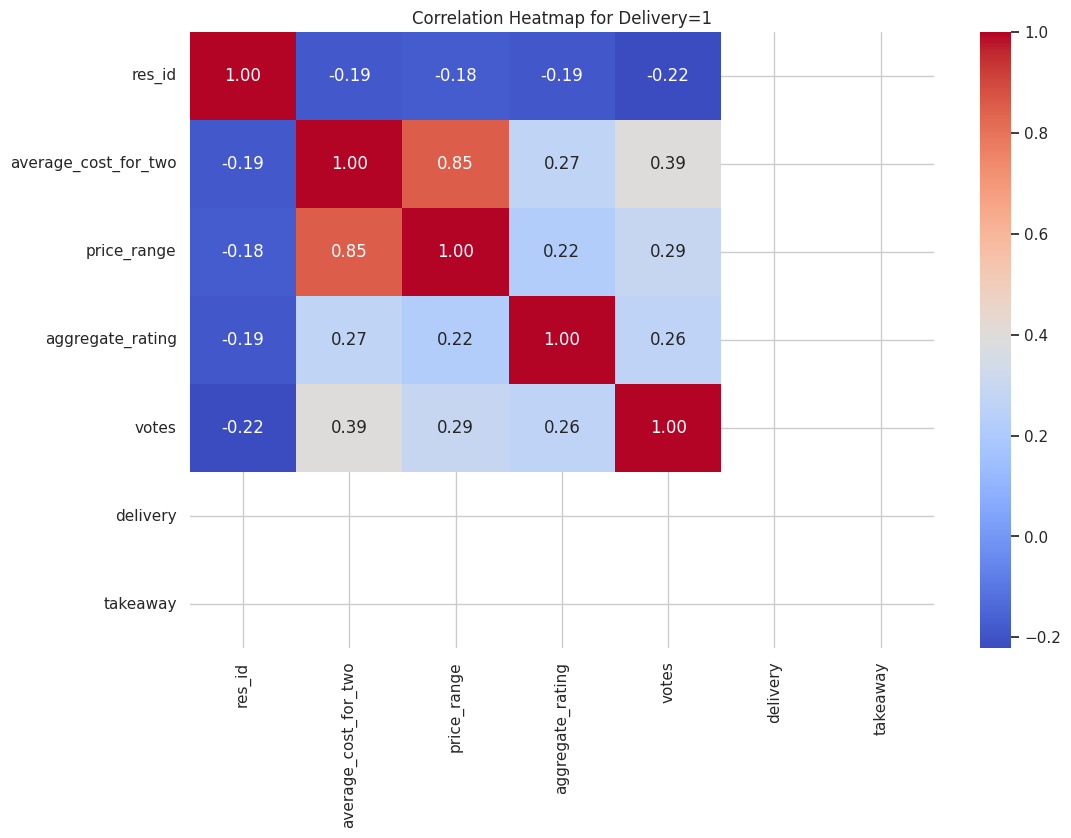

In [319]:
# Filter the DataFrame for rows where delivery is 1
delivery_1_df = df_zs[df_zs['delivery'] == 1]

# Identify numeric columns
numeric_columns = delivery_1_df.select_dtypes(include=['float64', 'int64']).columns

# Correlation heatmap
correlation_matrix = delivery_1_df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Delivery=1')
plt.show()


In [320]:
df_zs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60417 entries, 0 to 211942
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60417 non-null  int64  
 1   name                  60417 non-null  object 
 2   establishment         60417 non-null  object 
 3   city                  60417 non-null  object 
 4   locality              60417 non-null  object 
 5   cuisines              59947 non-null  object 
 6   timings               59347 non-null  object 
 7   average_cost_for_two  60417 non-null  int64  
 8   price_range           60417 non-null  int64  
 9   highlights            60417 non-null  object 
 10  aggregate_rating      60417 non-null  float64
 11  rating_text           60417 non-null  object 
 12  votes                 60417 non-null  int64  
 13  delivery              60417 non-null  int64  
 14  takeaway              60417 non-null  int64  
dtypes: float64(1), int64(6)

# Regional Analysis:

In [321]:


# Assuming df_zs is your DataFrame
# Group by 'city'
grouped_by_city = df_zs.groupby('city')

# Aggregate data for each city
regional_analysis = grouped_by_city.agg({
    'average_cost_for_two': 'mean',
    'aggregate_rating': 'mean',
    'votes': 'sum',

}).reset_index()

# Display the regional analysis
#print(regional_analysis)
# Sort the regional_analysis DataFrame by average aggregate rating
top_10_regions_wrt_aggregate_rating = regional_analysis.sort_values(by='aggregate_rating', ascending=False).head(10)

# Display the top 10 regions
print(top_10_regions_wrt_aggregate_rating)

            city  average_cost_for_two  aggregate_rating    votes
26       Gurgaon           1025.384615          3.872549   480826
81  Secunderabad            506.185567          3.848454   116876
56        Mumbai           1101.773050          3.795863  2443780
31     Hyderabad            847.322171          3.775751   975411
66     New Delhi           1018.305360          3.770005  1544924
46       Kolkata            707.147912          3.767233   928324
8      Bangalore            811.602537          3.729641  1939153
12       Chennai            708.369066          3.667764  1083486
67         Noida            759.816850          3.651648   156024
63   Navi Mumbai            752.382812          3.546094   123384


In [322]:
top_10_regions_wrt_average_cost_for_two = regional_analysis.sort_values(by='average_cost_for_two', ascending=False).head(10)

# Display the top 10 regions
print(top_10_regions_wrt_average_cost_for_two)

           city  average_cost_for_two  aggregate_rating    votes
56       Mumbai           1101.773050          3.795863  2443780
26      Gurgaon           1025.384615          3.872549   480826
66    New Delhi           1018.305360          3.770005  1544924
31    Hyderabad            847.322171          3.775751   975411
8     Bangalore            811.602537          3.729641  1939153
22          Goa            798.828058          3.051326   138263
67        Noida            759.816850          3.651648   156024
74         Pune            753.095238          3.534223   995210
63  Navi Mumbai            752.382812          3.546094   123384
34       Jaipur            716.222527          3.466209   417751


In [323]:
top_10_regions_wrt_votes = regional_analysis.sort_values(by='votes', ascending=False).head(10)

# Display the top 10 regions
print(top_10_regions_wrt_votes)

         city  average_cost_for_two  aggregate_rating    votes
56     Mumbai           1101.773050          3.795863  2443780
8   Bangalore            811.602537          3.729641  1939153
66  New Delhi           1018.305360          3.770005  1544924
12    Chennai            708.369066          3.667764  1083486
74       Pune            753.095238          3.534223   995210
31  Hyderabad            847.322171          3.775751   975411
46    Kolkata            707.147912          3.767233   928324
26    Gurgaon           1025.384615          3.872549   480826
34     Jaipur            716.222527          3.466209   417751
1   Ahmedabad            506.629044          3.266591   409909


# Cuisine Preferences

In [324]:
df_zs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60417 entries, 0 to 211942
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60417 non-null  int64  
 1   name                  60417 non-null  object 
 2   establishment         60417 non-null  object 
 3   city                  60417 non-null  object 
 4   locality              60417 non-null  object 
 5   cuisines              59947 non-null  object 
 6   timings               59347 non-null  object 
 7   average_cost_for_two  60417 non-null  int64  
 8   price_range           60417 non-null  int64  
 9   highlights            60417 non-null  object 
 10  aggregate_rating      60417 non-null  float64
 11  rating_text           60417 non-null  object 
 12  votes                 60417 non-null  int64  
 13  delivery              60417 non-null  int64  
 14  takeaway              60417 non-null  int64  
dtypes: float64(1), int64(6)

In [325]:
# Group by 'city' and 'cuisines'
grouped_by_city_cuisine = df_zs.groupby(['city', 'cuisines'])

# Aggregate data for each city and cuisine
city_cuisine_preferences = grouped_by_city_cuisine.agg({
    'res_id': 'count',  # Count the number of restaurants offering each cuisine
}).reset_index()

# Rename the 'res_id' column to 'restaurant_count'
city_cuisine_preferences = city_cuisine_preferences.rename(columns={'res_id': 'restaurant_count'})

# Sort the DataFrame by the number of restaurants in descending order
city_cuisine_preferences = city_cuisine_preferences.sort_values(by='restaurant_count', ascending=False)

# Display the city-wise cuisine preferences
print(city_cuisine_preferences.head(10))
#print(city_cuisine_preferences)

            city      cuisines  restaurant_count
8136      Jaipur  North Indian               204
8415   Jalandhar  North Indian               162
11814    Madurai  South Indian               142
10958       Kota  North Indian               135
15137  New Delhi  North Indian               133
4015     Chennai  South Indian               132
7566      Indore  North Indian               129
2663      Bhopal  North Indian               122
6740     Gwalior  North Indian               122
1266    Amritsar  North Indian               121


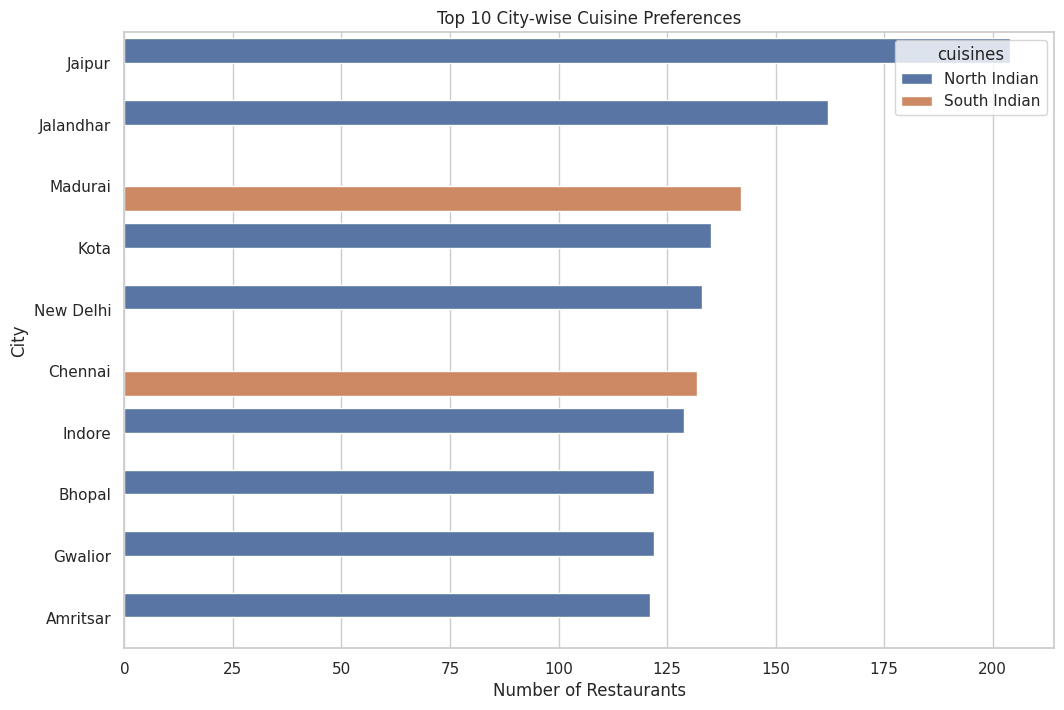

In [326]:

sns.set(style="whitegrid")

# Create a bar chart for the top 10 city-wise cuisine preferences
plt.figure(figsize=(12, 8))
sns.barplot(x='restaurant_count', y='city', hue='cuisines', data=city_cuisine_preferences.head(10))
plt.title('Top 10 City-wise Cuisine Preferences')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.savefig('Top-10-City-wise-Cuisine-Preferences.png')

plt.show()


# Preference of Cuisine by City

In [327]:
# Assuming df_zs is your DataFrame

# Drop rows where cuisines is null
df_zs = df_zs.dropna(subset=['cuisines'])

# Split the cuisines column into a list of cuisines
df_zs.loc[:, 'cuisines'] = df_zs['cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Explode the cuisines column to create multiple rows for each cuisine
df_cuisines = df_zs.explode('cuisines')

# Group by city and cuisine, then count the occurrences
city_cuisine_preference = df_cuisines.groupby(['city', 'cuisines']).size().reset_index(name='preference_count')

# Display the result
print(city_cuisine_preference)


          city      cuisines  preference_count
0         Agra        Afghan                 1
1         Agra         Asian                 5
2         Agra        Awadhi                 1
3         Agra        Bakery               103
4         Agra      Bar Food                 3
...        ...           ...               ...
4447  Zirakpur         Rolls                 6
4448  Zirakpur      Sandwich                 3
4449  Zirakpur  South Indian                 9
4450  Zirakpur   Street Food                 7
4451  Zirakpur          Thai                 3

[4452 rows x 3 columns]


# Top Preference of each city based on the count of occurrences of each cuisine in the restaurants of that city.

In [328]:
# Assuming df_zs is your DataFrame

# Drop rows where cuisines is null
df_zs = df_zs.dropna(subset=['cuisines'])

# Split the cuisines column into a list of cuisines
df_zs.loc[:, 'cuisines'] = df_zs['cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Explode the cuisines column to create multiple rows for each cuisine
df_cuisines = df_zs.explode('cuisines')

# Group by city and cuisine, then count the occurrences
city_cuisine_preference = df_cuisines.groupby(['city', 'cuisines']).size().reset_index(name='preference_count')

# Find the index of the maximum preference count for each city
idx = city_cuisine_preference.groupby('city')['preference_count'].idxmax()

# Get the corresponding rows
top_preference_by_city = city_cuisine_preference.loc[idx]

# Display the result
print(top_preference_by_city)


            city      cuisines  preference_count
34          Agra  North Indian               366
91     Ahmedabad  North Indian               407
137        Ajmer  North Indian               224
167    Alappuzha        Kerala                97
203    Allahabad  North Indian               272
...          ...           ...               ...
4270    Varanasi  North Indian               297
4317     Vellore  South Indian               130
4355  Vijayawada  North Indian               203
4403       Vizag  North Indian               236
4443    Zirakpur  North Indian                73

[99 rows x 3 columns]


# Top preference for each city based on the sum of votes

In [330]:


# Assuming df_zs is your DataFrame

# Drop rows where cuisines is null
df_zs = df_zs.dropna(subset=['cuisines'])

# Split the cuisines column into a list of cuisines
df_zs.loc[:, 'cuisines'] = df_zs['cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Explode the cuisines column to create multiple rows for each cuisine
df_cuisines = df_zs.explode('cuisines')

# Group by city, cuisine, and sum the votes
city_cuisine_votes = df_cuisines.groupby(['city', 'cuisines'])['votes'].sum().reset_index(name='total_votes')

# Find the index of the maximum total votes for each city
idx = city_cuisine_votes.groupby('city')['total_votes'].idxmax()

# Get the corresponding rows
top_preference_by_city = city_cuisine_votes.loc[idx]

# Display the result
print(top_preference_by_city)


            city      cuisines  total_votes
34          Agra  North Indian        40943
91     Ahmedabad  North Indian       172552
137        Ajmer  North Indian        13344
167    Alappuzha        Kerala          117
203    Allahabad  North Indian        22814
...          ...           ...          ...
4270    Varanasi  North Indian        24480
4317     Vellore  South Indian         2174
4355  Vijayawada  North Indian        27785
4403       Vizag  North Indian        61808
4443    Zirakpur  North Indian         8126

[99 rows x 3 columns]


# Least preferred cuisine based on the sum of votes

In [331]:



# Drop rows where cuisines is null
df_zs = df_zs.dropna(subset=['cuisines'])

# Split the cuisines column into a list of cuisines
df_zs.loc[:, 'cuisines'] = df_zs['cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Explode the cuisines column to create multiple rows for each cuisine
df_cuisines = df_zs.explode('cuisines')

# Group by city, cuisine, and sum the votes
city_cuisine_votes = df_cuisines.groupby(['city', 'cuisines'])['votes'].sum().reset_index(name='total_votes')

# Find the index of the minimum total votes for each city
idx = city_cuisine_votes.groupby('city')['total_votes'].idxmin()

# Get the corresponding rows
least_preference_by_city = city_cuisine_votes.loc[idx]

# Display the result
print(least_preference_by_city)


            city      cuisines  total_votes
13          Agra   Drinks Only            1
47     Ahmedabad        Afghan            1
112        Ajmer      Bar Food            1
152    Alappuzha         Asian            0
204    Allahabad          Paan            1
...          ...           ...          ...
4253    Varanasi  Healthy Food            5
4292     Vellore    Bubble Tea            1
4329  Vijayawada      Bar Food            2
4398       Vizag        Mishti            0
4444    Zirakpur          Paan            9

[99 rows x 3 columns]
